In [3]:
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
from aurora.sandbox.io_helpers.emtf_band_setup import EMTFBandSetupFile

%matplotlib widget

In [4]:
bs_fn = Path(
    r"C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\iris-mt-course-2022\data\transfer_functions\phx_24k_bs.txt"
)

sample_rate = 24000
window_size = 1024
decimation_factor = 4

a = EMTFBandSetupFile(filepath=bs_fn, sample_rate=sample_rate)
decimation_list = a.num_decimation_levels * [decimation_factor]
decimation_list[0] = 1

windows = [window_size] * a.num_decimation_levels
band_edges = a.compute_band_edges(decimation_list, windows)


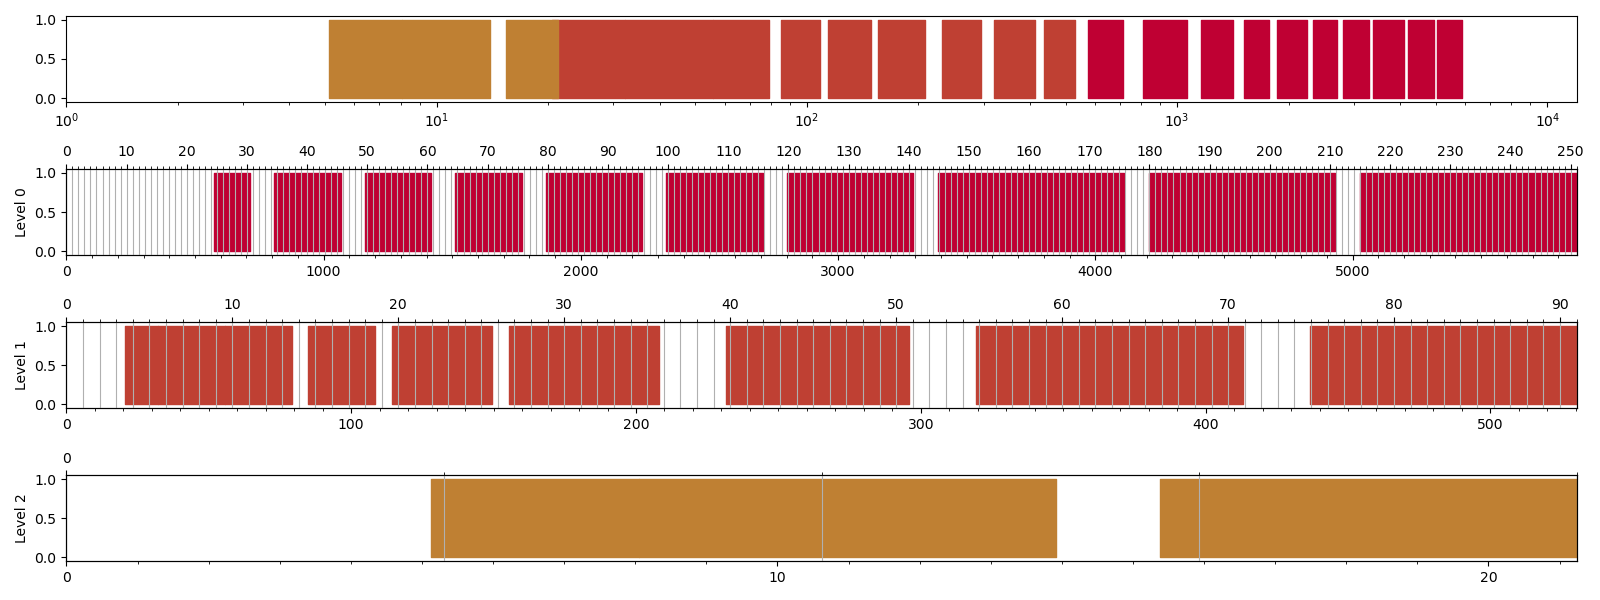

In [5]:

fig = plt.figure(13, [16,6])
ax1 = fig.add_subplot(a.num_decimation_levels+ 1, 1, 1)
ax1.set_xscale("log")
index = np.arange(int(window_size/2))

for dec_level, bands in band_edges.items():
    d_sample_rate = sample_rate / (decimation_list[dec_level])
    plot_freq = np.linspace(0, d_sample_rate/2, num=int(window_size/2))
    if dec_level ==0:
        ax1.set_xlim(1, plot_freq.max())
    ax = fig.add_subplot(a.num_decimation_levels+1, 1, dec_level + 2)
    for band in bands:
        ax.fill_between(band, [0, 0], [1, 1], color=(.75, dec_level*.25, .2))
        ax1.fill_between(band, [0, 0], [1, 1], color=(.75, dec_level*.25, .2))
    ax.set_xlim(0, bands[0][1])
    ax.set_ylabel(f"Level {dec_level}")
    log_level = np.floor(np.log10(bands[0][1]))
    ax.xaxis.set_major_locator(MultipleLocator(10**log_level))
    ax.xaxis.set_minor_locator(MultipleLocator(10**(log_level - 1)))
    ax2 = ax.twiny()
    ax2.set_xticks(index)
    ax2.xaxis.set_major_locator(MultipleLocator(10))
    ax2.xaxis.set_minor_locator(MultipleLocator(1))
    ax2.grid(which="both")
    ax2.set_axisbelow(True)
    ax2.set_xlim(0, np.where(plot_freq > bands[0][1])[0][0])


fig.tight_layout()
    

In [6]:
bs_fn = band_file_24k = Path(
    r"C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\iris-mt-course-2022\data\transfer_functions\bs_eight_level.cfg"
)

sample_rate = 2150
window_size = 128
decimation_factor = 4

a = EMTFBandSetupFile(filepath=bs_fn, sample_rate=sample_rate)
decimation_list = a.num_decimation_levels * [decimation_factor]
decimation_list[0] = 1

windows = [window_size] * a.num_decimation_levels
band_edges = a.compute_band_edges(decimation_list, windows)

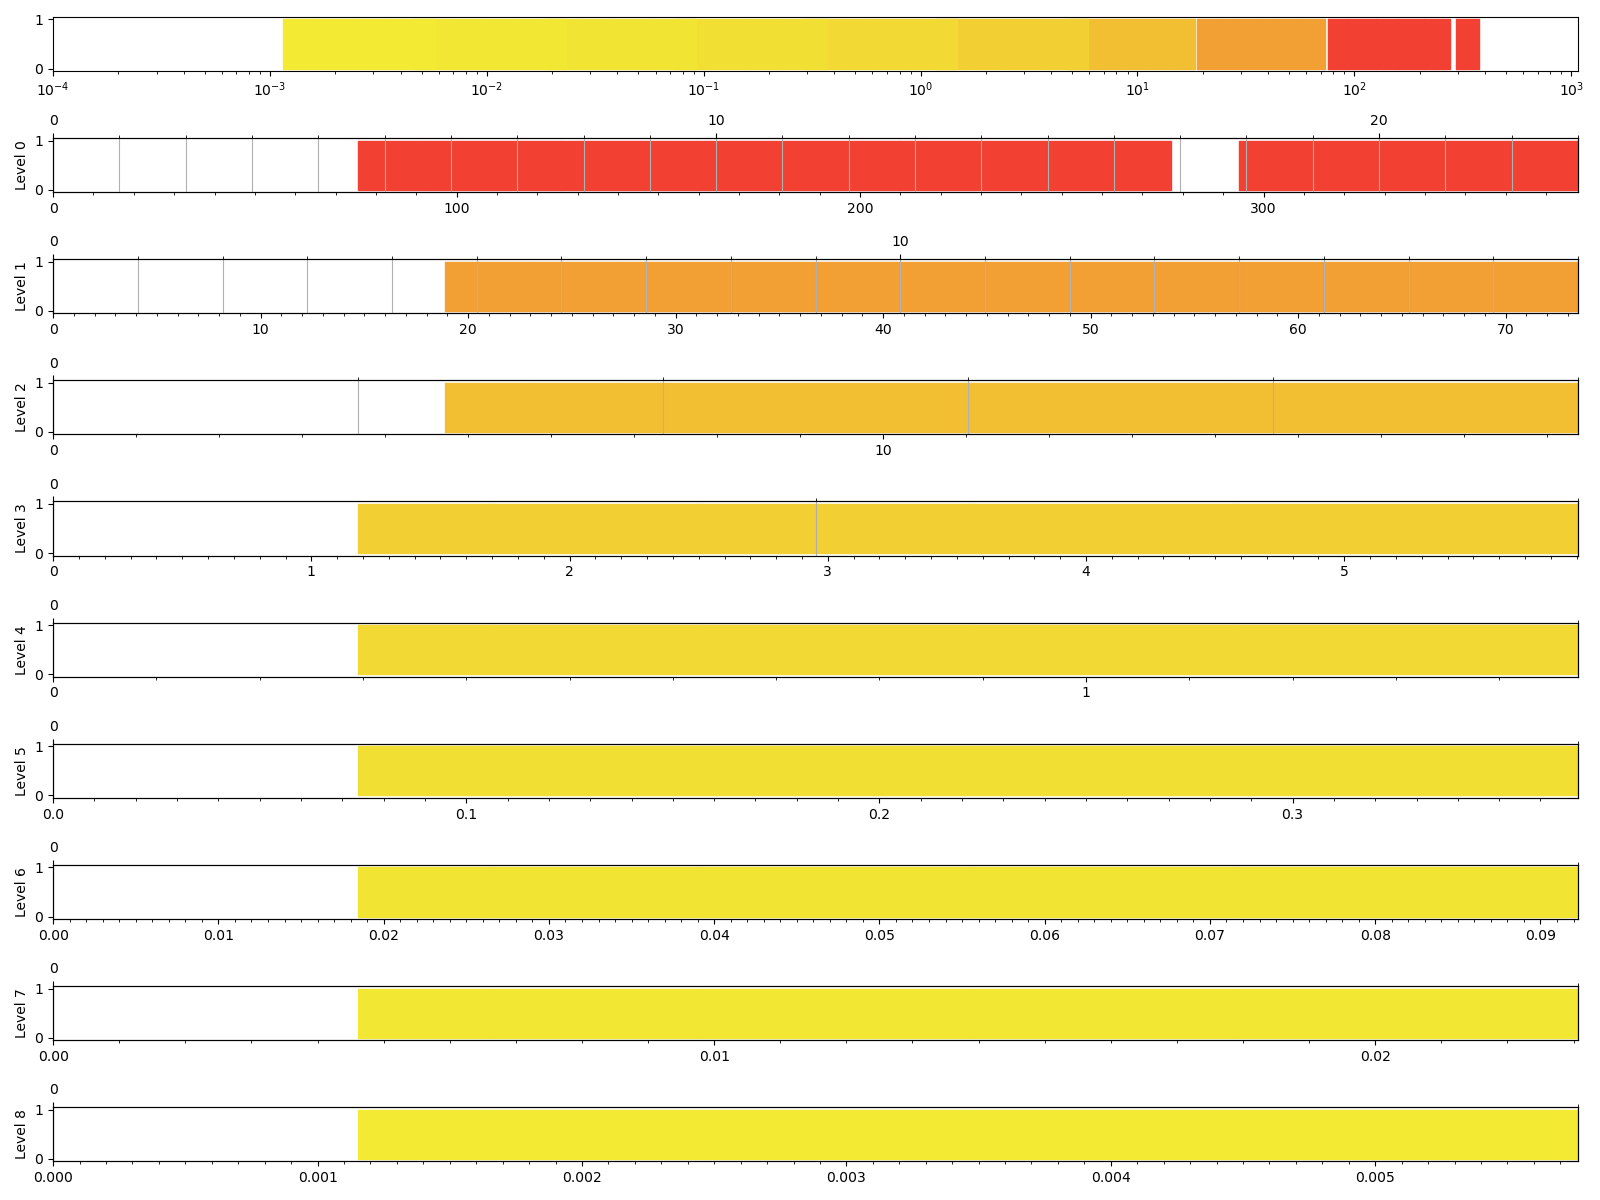

In [7]:
fig = plt.figure(27, [16,12])
ax1 = fig.add_subplot(a.num_decimation_levels+ 1, 1, 1)
ax1.set_xscale("log")
index = np.arange(int(window_size/2))

for dec_level, bands in band_edges.items():
    d_sample_rate = sample_rate / (decimation_list[dec_level])
    plot_freq = np.linspace(0, d_sample_rate/2, num=int(window_size/2))
    if dec_level ==0:
        ax1.set_xlim(1E-4, plot_freq.max())
    ax = fig.add_subplot(a.num_decimation_levels+1, 1, dec_level + 2)
    for band in bands:
        ax.fill_between(band, [0, 0], [1, 1], color=(.95, 1- .75/(dec_level + 1), .2))
        ax1.fill_between(band, [0, 0], [1, 1], color=(.95, 1- .75/(dec_level + 1), .2))
    ax.set_ylabel(f"Level {dec_level}")
    ax.set_xlim(0, bands[0][1])
    log_level = np.floor(np.log10(bands[0][1]))
    ax.xaxis.set_major_locator(MultipleLocator(10**log_level))
    ax.xaxis.set_minor_locator(MultipleLocator(10**(log_level - 1)))
    ax2 = ax.twiny()
    ax2.set_xticks(index)
    ax2.xaxis.set_major_locator(MultipleLocator(10))
    ax2.xaxis.set_minor_locator(MultipleLocator(1))
    ax2.grid(which="both")
    ax2.set_axisbelow(True)
    ax2.set_xlim(0, np.where(plot_freq > bands[0][1])[0][0])


fig.tight_layout()